Image moments and equivalent ellipse.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import os
from datetime import datetime
import math
import os
import sys
import nxpd
import skimage

nxpd.nxpdParams['show'] = 'ipynb'

In [4]:
import initdirs

from visioncg import regions
from visioncg import viz

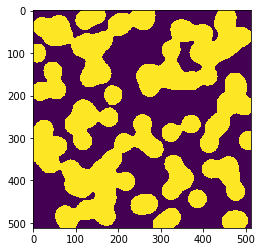

In [5]:
im = np.array(skimage.data.binary_blobs(seed=42), dtype=np.uint8)

_ = plt.imshow(im)

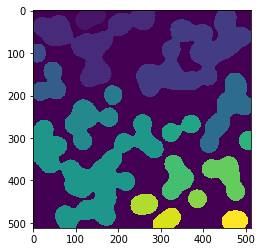

In [6]:
labels, ccomp_df = regions.find_ccomp(im)

_ = plt.imshow(labels)

In [7]:
ccomp_df

,left,top,width,height,area,x,y
0,0,0,512,512,131072,259.869781,265.256165
1,99,0,72,47,2576,132.955357,19.943711
2,0,0,288,182,18950,138.950501,71.288654
3,243,0,269,204,26522,378.229809,104.229734
4,0,79,31,45,1170,13.313675,100.858974
5,0,121,78,92,4738,40.454411,172.962431
6,392,147,120,189,10158,453.743552,237.177003
7,167,177,43,47,1574,187.722363,199.332910
8,74,210,126,119,7834,127.833035,262.646413
9,0,245,307,267,33481,139.717571,378.349273


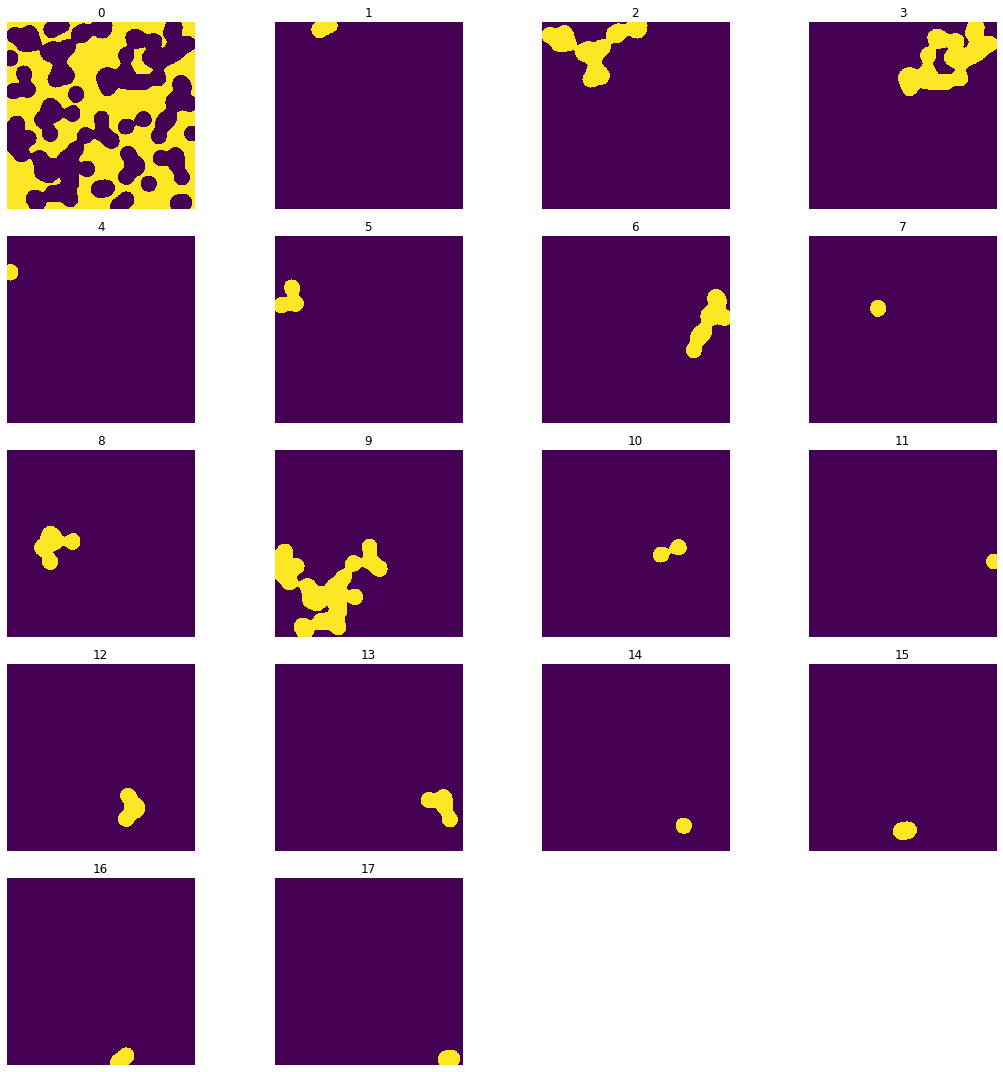

In [8]:
plt.figure(figsize=(15, 15))

viz.imshow_grid(
    images=[labels == label for label in ccomp_df.index],
    titles=range(len(ccomp_df.index))
)

plt.tight_layout()

In [9]:
def get_binary_object(labels, val):
    return np.array(labels==val, dtype=np.uint8)

In [10]:
def plot_ellipse(center_x, center_y, d1, d2, theta):
    
    from matplotlib.patches import Ellipse

    ellipse = Ellipse([center_x, center_y], d1, d2, math.degrees(theta))
    ellipse.set_alpha(0.5)
    
    ax = plt.gca()
    ax.add_artist(ellipse)
    

In [11]:
def plot_object_and_eqellipse(im_binary):
    center_x, center_y, d1, d2, theta = regions.region_ellipse_from_moments(im_binary)

    plt.imshow(im_binary)
    plt.plot(center_x, center_y, 'ro')

    plot_ellipse(center_x, center_y, d1, d2, theta)

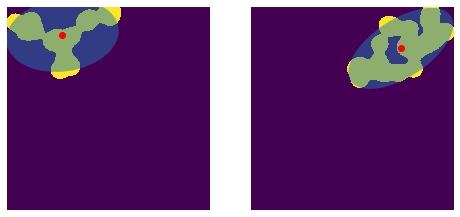

In [12]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plot_object_and_eqellipse(get_binary_object(labels, 2))
_ = plt.axis('off')

plt.subplot(1, 2, 2)
plot_object_and_eqellipse(get_binary_object(labels, 3))
_ = plt.axis('off')

In [13]:
cv2.moments(get_binary_object(labels, 2), binaryImage=True)

{'m00': 18950.0,
 'm10': 2633112.0,
 'm01': 1350920.0,
 'm20': 461500016.0,
 'm11': 180219314.0,
 'm02': 136719572.0,
 'm30': 91083758364.0,
 'm21': 27617499430.0,
 'm12': 18662001658.0,
 'm03': 16737103910.0,
 'mu20': 95627783.57023746,
 'mu11': -7491697.242216378,
 'mu02': 40414303.06068601,
 'mu30': 383042847.6843262,
 'mu21': -3200265519.711149,
 'mu12': 732894618.8889656,
 'mu03': 1228387034.658369,
 'nu20': 0.2662966244184807,
 'nu11': -0.020862280942673412,
 'nu02': 0.11254252772031943,
 'nu30': 0.007748619259610646,
 'nu21': -0.0647385512921467,
 'nu12': 0.014825812291026419,
 'nu03': 0.024849187219008164}

In [14]:
def verify_moments(im_binary):
    
    m = cv2.moments(im_binary, binaryImage=True)
        
    x = m['m10'] / m['m00']
    y = m['m01'] / m['m00']
        
    mu20_norm = m['mu20'] / m['m00']
    mu02_norm = m['mu02'] / m['m00']
    
    mu20_my = m['m20'] / m['m00'] - x**2
    mu02_my = m['m02'] / m['m00'] - y**2
    
    assert abs(mu20_norm - mu20_my) < 1e-9
    assert abs(mu02_norm - mu02_my) < 1e-9
    
    
verify_moments(get_binary_object(labels, 2))